Week 12 Lab
Part 1:
1.	Place your radiation counter and thorium source 10 cm apart.
2.	Record data for 5 minutes 
a.	This data should be collected in intervals (10 seconds) with time stamps
3.	Do the same for the unknown source provided – be sure to place it the same distance from the detector (why does this matter?)
4.	Repeat steps 1-3 with the spectrometer (using 5 second intervals) using the graphical interface already installed on your raspberry pi system.
5.	Upload both sets of data to your GitHub repository


Part 2:

In [1]:
import math
import numpy as np
import pandas as pd
# This line allows plots to show in the Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
import io
import requests

1.	Using a Jupyter notebook, read in both sets of data (using pandas or numpy, or another file reading tool). Include answers to any questions in your Jupyter notebook and push this notebook to your git repository, only one notebook per group is required.


In [2]:
data_Unknown_Sct = pd.read_csv('Scint_UnknownSource.csv')

In [3]:
data_Unknown_PktGeig = pd.read_csv('PktGeig_UnknownSource.csv')

In [4]:
data_Thorium_Sct = pd.read_csv('Scint_Thorium.csv')

In [5]:
data_Thorium_PktGeig = pd.read_csv('PktGeig_Thorium.csv')

2.	Plot histograms of the counts from each detector. How do the mean (μ) and standard deviation (σ) compare? What about the relative, or percent, uncertainty: σ/μ?
a.	How do the measured standard deviations compare to the theoretical uncertainty you would expect from counting statistics?


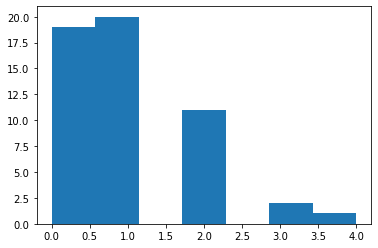

In [6]:
plt.hist(data_Unknown_Sct["Counts"], bins = 7)
plt.show()

In [7]:
mean_Unk_sct = np.mean(data_Unknown_Sct["Counts"])
print(mean_Unk_sct)
std_Unk_Sct = np.std(data_Unknown_Sct["Counts"])
print(std_Unk_Sct)
#Relative Uncert = Counts(1 +/- 1/uncert) = counts +/- count/(uncert)
sum_Unk_Sct = np.sum(data_Unknown_Sct["Counts"])
uncert_Unk_Sct = np.sqrt(sum_Unk_Sct)
perc_Unk_Sct = (1/uncert_Unk_Sct) * 100
print("The percent uncertainty is", perc_Unk_Sct, "%")
print("The relative uncertainty is", sum_Unk_Sct, "+/-", ((perc_Unk_Sct/100)*sum_Unk_Sct))

0.9811320754716981
0.9415075433867658
The percent uncertainty is 13.867504905630728 %
The relative uncertainty is 52 +/- 7.211102550927979


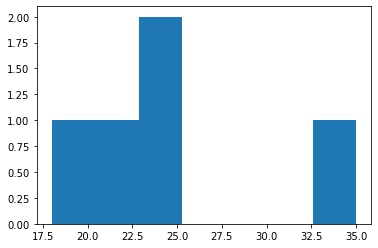

In [8]:
plt.hist(data_Unknown_PktGeig["CPM"], bins = 7)
plt.show()

In [9]:
mean_Unk_Geig = np.mean(data_Unknown_PktGeig["CPM"])
print(mean_Unk_Geig)
std_Unk_Geig = np.std(data_Unknown_PktGeig["CPM"])
print(std_Unk_Geig)
#Relative Uncert = Counts(1 +/- 1/uncert) = counts +/- count/(uncert)
sum_Unk_Geig = np.sum(data_Unknown_PktGeig["CPM"])
uncert_Unk_Geig = np.sqrt(sum_Unk_Geig)
perc_Unk_Geig = (1/uncert_Unk_Geig) * 100
print("The percent uncertainty is", perc_Unk_Geig, "%")
print("The relative uncertainty is", sum_Unk_Geig, "+/-", ((perc_Unk_Geig/100)*sum_Unk_Geig))

25.0
5.621387729022079
The percent uncertainty is 8.94427190999916 %
The relative uncertainty is 125 +/- 11.180339887498949


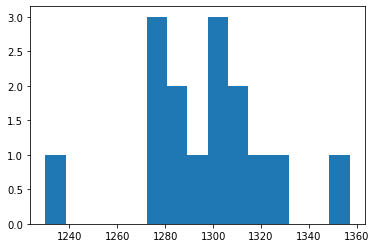

In [10]:
plt.hist(data_Thorium_Sct["Counts"], bins = 15)
plt.show()

In [11]:
mean_Thr_sct = np.mean(data_Thorium_Sct["Counts"])
print(mean_Thr_sct)
std_Thr_Sct = np.std(data_Thorium_Sct["Counts"])
print(std_Thr_Sct)
uncert_Thr_Sct = np.sqrt(np.sum(data_Thorium_Sct["Counts"]))
print(uncert_Thr_Sct)

#Relative Uncert = Counts(1 +/- 1/uncert) = counts +/- count/(uncert)
sum_Thr_Sct = np.sum(data_Thorium_Sct["Counts"])
uncert_Thr_Sct = np.sqrt(sum_Thr_Sct)
perc_Thr_Sct = (1/uncert_Thr_Sct) * 100
print("The percent uncertainty is", perc_Thr_Sct, "%")
print("The relative uncertainty is", sum_Thr_Sct, "+/-", ((perc_Thr_Sct/100)*sum_Thr_Sct))

1297.4666666666667
28.092387264563726
139.50627226042562
The percent uncertainty is 0.7168136484453069 %
The relative uncertainty is 19462 +/- 139.50627226042562


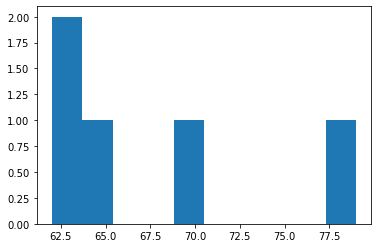

In [12]:
plt.hist(data_Thorium_PktGeig["CPM"], bins = 10)
plt.show()

In [13]:
mean_Thr_Pkt = np.mean(data_Thorium_PktGeig["CPM"])
print(mean_Thr_Pkt)
std_Thr_Pkt = np.std(data_Thorium_PktGeig["CPM"])
print(std_Thr_Pkt)
uncert_Thr_Pkt = np.sqrt(np.sum(data_Thorium_PktGeig["CPM"]))
print(uncert_Thr_Pkt)

#Relative Uncert = Counts(1 +/- 1/uncert) = counts +/- count/(uncert)
sum_Thr_Pkt = np.sum(data_Thorium_PktGeig["CPM"])

uncert_Thr_Sct = np.sqrt(sum_Thr_Pkt)
perc_Thr_Pkt = (1/uncert_Thr_Pkt) * 100
print("The percent uncertainty is", perc_Thr_Pkt, "%")
print("The relative uncertainty is", sum_Thr_Pkt, "+/-", ((perc_Thr_Pkt/100)*sum_Thr_Pkt))

67.6
6.1838499334961226
18.384776310850235
The percent uncertainty is 5.439282932204212 %
The relative uncertainty is 338 +/- 18.384776310850235


The standard deviation for the Thorium data from both the scintillator and the pocket geiger seems to be significantly higher than that of the Unknown source. As far as I can tell this is likely because the Thorium source is far more active which would probably cause higher standard deviation. 

The thorium data also seems to have lower percent and relative uncertainties which is somewhat expected because relative uncertainty is given by Ncounts ( 1 +/- ( 1 / sqrt(Ncount) ) ) so the source with greater counts should give lower uncertainties.

3.)	
During our week 4 class, we estimated the activity (A) of a 0.25 kg thorium ore rock to be 30,593 Bq (decays/s). Assuming this rock would have the same specific activity (A/kg), and has a mass of 0.1kg, calculate the efficiency of the two detectors you used to collect data.

NOTE: Recall from the class discussion this week that detector efficiency is the proportionality constant between count-rate and source activity:
CPS = ϵA

Specific activity of Thorium: 30593 Bq / .25 kg = 122372 Bq/kg
Activity of our rock = 122372 Bq/kg * .1 kg = 12237 Bq

Scintillator Data taken over 80 seconds

In [14]:
Thor_Sct_Act = sum_Thr_Sct/80
print (Thor_Sct_Act)
#CPS = efficiency * Activity
#Efficiency = CPS/Act
scint_efficiency = Thor_Sct_Act / 12237
print (scint_efficiency)


Thor_Pkt_Act = sum_Thr_Pkt / 300 #5 minutes of data = 300 seconds
print (Thor_Pkt_Act) 
#CPS = efficiency * Activity
#Efficiency = CPS/Act
PktGeig_efficiency = Thor_Pkt_Act / 12237
print (scint_efficiency)

243.275
0.019880281114652284
1.1266666666666667
0.019880281114652284


4.	Propagate uncertainties to estimate the uncertainty on your efficiencies.

In [19]:
#combining relative uncertainty : (1 +/- (np.sqrt(((uncert/cpm)**2)+)))
sct_rel_percuncert = np.sqrt( ((uncert_Unk_Sct/sum_Unk_Sct)**2) + ((uncert_Thr_Sct/sum_Thr_Sct)**2)  ) * 100
scint_uncert = sct_rel_percuncert / 100
print (sct_rel_percuncert, "% on our efficiency of the scintillator detector")

pkt_rel_percuncert = np.sqrt( ((uncert_Unk_Geig/sum_Unk_Geig)**2) + ((uncert_Thr_Pkt/sum_Thr_Pkt)**2)  ) * 100
pock_uncert = pkt_rel_percuncert / 100
print (pkt_rel_percuncert, "% on our efficiency of the Pocket geiger detector")

13.86782664810843 % on our efficiency of the scintillator detector
10.468323591510153 % on our efficiency of the Pocket geiger detector


5.	How do the efficiencies of the two detectors compare? Which is more sensitive?

The efficiency coefficient of the pocket geiger detector is worse than that of the scintillator detector by a couple orders of magnitude. Thus the scintillator is reasonably more sensitive than the pocket geiger detector given the sheer size of the detectors in comparison.

6.    Use your estimate of the detector efficiency to determine the activity of the unknown source.
    Be sure to propagate uncertainties – as a reminder, you can use the following equation to propagate uncertainties in a ratio:
    f = A/B,(σ_f/f)^2=(σ_A/A)^2+(σ_B/B)^2


In [38]:
act_Unk_sct = sum_Unk_Sct / (scint_efficiency)
act_Unk_pkt = sum_Unk_Geig / (PktGeig_efficiency) 
total_rel_uncert = np.sqrt( (scint_efficiency**2) + (PktGeig_efficiency**2) )



Unknown_act = total_uncert / (np.sqrt ( ((scint_uncert / act_Unk_sct) **2) +  ((scint_uncert / act_Unk_sct) **2) ) )
Unknown_act = 1 / (np.sqrt ( (1/act_Unk_pkt**2) +  (1/act_Unk_sct**2) ) )
total_uncert = Unknown_act * total_rel_uncert
print ("The activity of the unknown source is", Unknown_act, " +/-", total_uncert, "Bq (Decays per second)")


The activity of the unknown source is 2615.652323728099  +/- 52.0004611496033 Bq (Decays per second)


7.)	
If all 8 lab groups combined their data (assuming all detectors had the same efficiency) how would the uncertainties on the efficiency for each detector change, and how would the uncertainty on the activity of the unknown source change?

Theoretically the uncertainties would decrease because, we have a much greater number of observations, however, we will use the mean of the counts from each sample which should be relatively similar in magnitude so the relative uncertainty would drop with no increase in counts and therefore the uncertainty on the efficiency of the detector as a whole should remain the same.